# Summary

The following code tests the LightGBM model on crash data from the year 2021.

#### Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from model_training.save_load_model import load_lgb_model


pth = '../data/train_test_split_final/test.csv'


test_data = pd.read_csv(pth)

cols = test_data.columns
X_test = test_data[cols[:-4]]
y_test = test_data[cols[-4:]].copy()
y_test[cols[-1]] = y_test[cols[-1]].round().astype(int)

out_cols = y_test.columns
reg_cols = out_cols[:3]
multi_col = out_cols[3]

models = {}
for col in out_cols:
    model = load_lgb_model(f'{col}_model', '../final_models')
    model.set_params(verbosity=-1)
    models[col] = model

#### Test model

In [5]:
y_pred = []
for name, mod in models.items():
    pred = mod.predict(X_test)
    y_pred.append(pred)

y_pred = np.array(y_pred).T
y_pred[:,-1] = np.around(y_pred[:,-1]).astype(int)

y_test = np.array(y_test)

#### Results

Column          | Test MSE
----------------|----------
FATAL_COUNT	|  0.083
INJURY_COUNT	|  0.752
TOT_INJ_COUNT	|  0.753

MAX_SEVERITY_LEVEL Accuracy: 4.09%


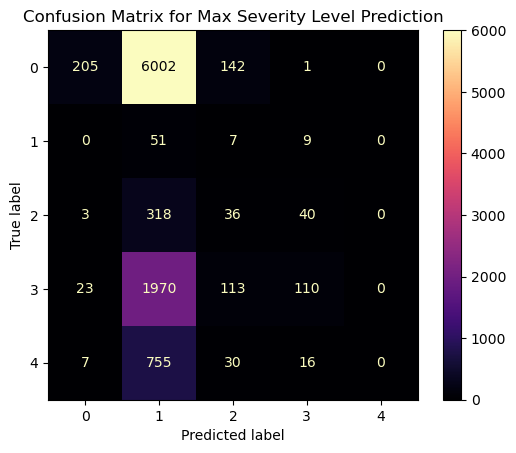

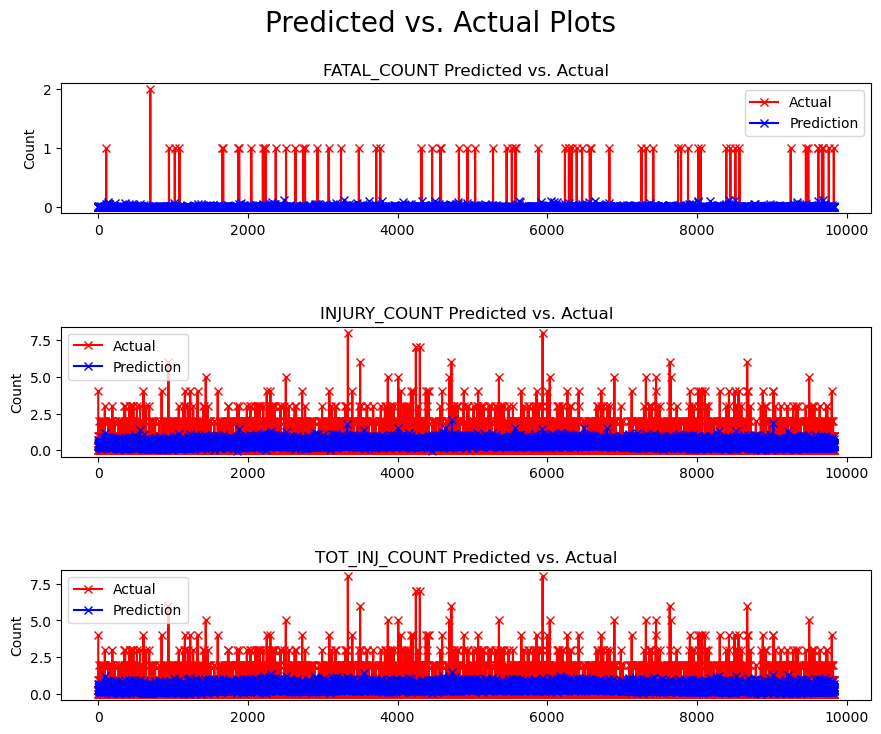

In [6]:
from sklearn.metrics import accuracy_score, root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

print("Column          | Test MSE")
print("----------------|----------")
for i in range(3):
    pred = y_pred[:,i]
    true = y_test[:,i]
    mse = root_mean_squared_error(true, pred)
    print(f"{reg_cols[i]}\t|  {mse:.3f}")

accuracy = accuracy_score(y_test[:,-1], y_pred[:,-1]) * 100
print(f"\n{multi_col} Accuracy: {accuracy:.2f}%")

cmat = confusion_matrix(y_test[:,-1], y_pred[:,-1])
disp = ConfusionMatrixDisplay(cmat)
disp.plot(cmap='magma')
plt.title("Confusion Matrix for Max Severity Level Prediction")
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
for i in range(3):
    ax = axs[i]
    ax.plot(y_test[:,i], color='r', label='Actual', marker='x')
    ax.plot(y_pred[:,i], color='b', label='Prediction', marker='x')
    ax.set_ylabel('Count')
    ax.set_title(f'{reg_cols[i]} Predicted vs. Actual')
    ax.legend()

plt.tight_layout(pad=5)
plt.suptitle('Predicted vs. Actual Plots', fontsize=20)
plt.show()